# Feature Selection

Feature selection is the process of selecting a subset of relevant features for use in model construction


## Top reasons to use feature selection are:
* It enables the machine learning algorithm to train faster.
* It reduces the complexity of a model and makes it easier to interpret.
* It improves the accuracy of a model if the right subset is chosen.
* It reduces overfitting.

***Import the packages we will use for this notebook***

In [30]:
import pandas as pd
pd.set_option('display.max_columns', 300)
import numpy as np
from matplotlib import pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
import seaborn as sns
sns.set(style="whitegrid")



***Set up or initial dataframe by removing variable and transforming others.***

In [31]:
 df = pd.read_csv('https://raw.githubusercontent.com/learn-co-students/nyc-mhtn-ds-042219-lectures/master/Module_4/biasvariance/kc_house_data.csv' ,index_col='id')

In [32]:
df['yr_old']=2017 - df['yr_built']
df['date'] = pd.to_datetime(df['date'])

df['year_sold'] = df['date'].map(lambda x: x.year )
df['since_sold'] = 2017  -df['year_sold'] 
df = df[df['price']<4000000]
df= df[df['bedrooms']<15]

df['price_log'] = np.log(df['price'])

In [33]:
cols  = ['price_log', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
         'grade', 'sqft_above','sqft_basement', 'yr_renovated', 
       'sqft_living15', 'sqft_lot15', 'yr_old', 'since_sold',
       ]

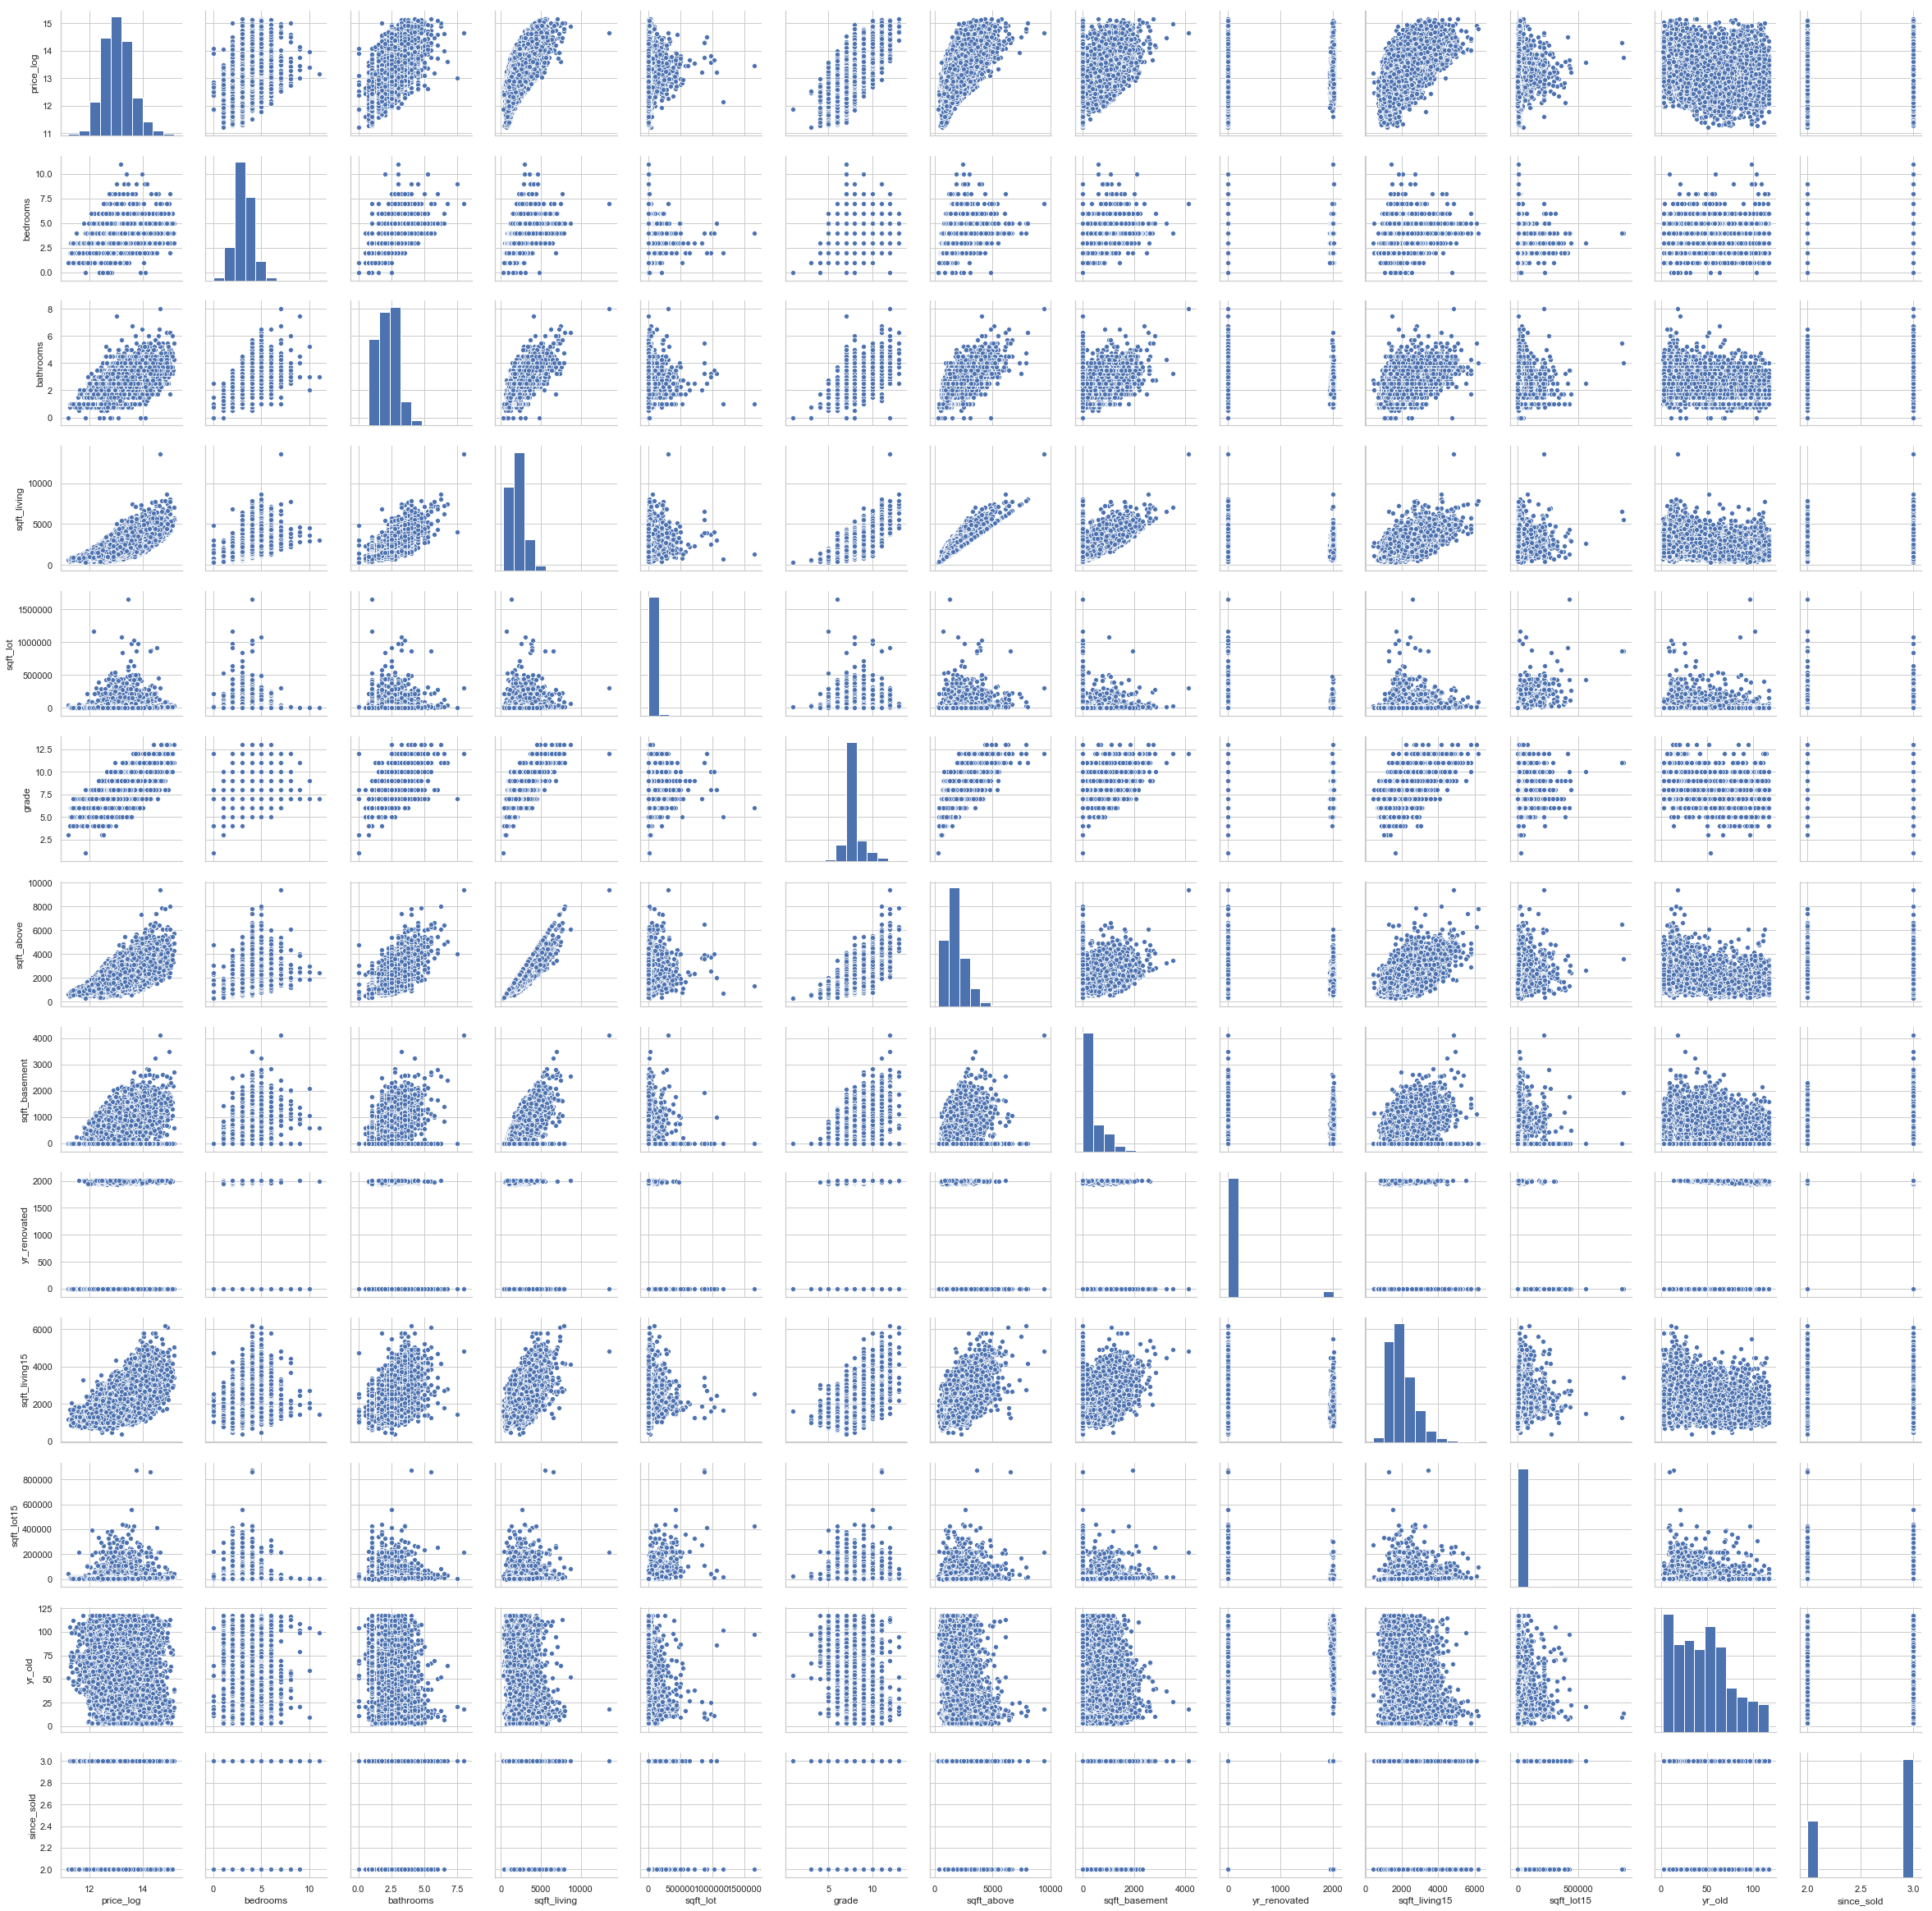

In [34]:
sns.pairplot(df, vars=cols)

In [35]:

df['sqft_living_log'] = np.log(df['sqft_living'])
df['sqft_above_log'] = np.log(df['sqft_above'])
df['sqft_living15_log'] = np.log(df['sqft_living15'])



In [36]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'yr_old', 'year_sold', 'since_sold',
       'price_log', 'sqft_living_log', 'sqft_above_log', 'sqft_living15_log'],
      dtype='object')

In [37]:
feature_columns = ['bedrooms', 'bathrooms', 'sqft_lot','floors', 'waterfront', 
 'view', 'condition', 'grade','sqft_basement', 'yr_renovated', 'zipcode', 'lat', 'long',
 'sqft_lot15', 'yr_old', 'since_sold','sqft_living_log', 
 'sqft_above_log', 'sqft_living15_log']

In [38]:
target = df['price_log']
features = df[feature_columns]


In [39]:
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=34,test_size=0.2)


In [40]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train =pd.DataFrame(data=scaler.transform(X_train), columns=feature_columns)
X_test =pd.DataFrame(data=scaler.transform(X_test), columns=feature_columns)

/Users/erikadauria/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/erikadauria/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/erikadauria/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


## Types of Feature Selection

* Filter Methods
* Wrapper Methods
* Embedded Methods

# Filter Methods
Filter feature selection methods apply a statistical measure to assign a scoring to each feature. The features are ranked by the score and either selected to be kept or removed from the dataset. The methods are often univariate and consider the feature independently, or with regard to the dependent variable.

![alt text](./resources/Filter_1.png)

**Examples:** 
* F-Test
* Chi squared test 
* Information gain 
* Correlation coefficient scores

![alt text](./resources/FS1.webp)

### Removing Variables based on correlation coefficient

In [41]:
# Create correlation matrix
corr_matrix = X_train.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper

,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_renovated,zipcode,lat,long,sqft_lot15,yr_old,since_sold,sqft_living_log,sqft_above_log,sqft_living15_log
bedrooms,NaN,0.53002,0.036030,0.183029,0.010245,0.085818,0.023423,0.365484,0.309162,0.017572,0.153681,0.011145,0.131030,0.033370,0.161205,0.011949,0.634988,0.526480,0.412305
bathrooms,NaN,NaN,0.089223,0.507841,0.052506,0.186547,0.126874,0.662341,0.273413,0.046164,0.198083,0.026146,0.219976,0.092670,0.508137,0.028800,0.760225,0.696238,0.565961
sqft_lot,NaN,NaN,NaN,0.001608,0.023191,0.073394,0.009503,0.114325,0.022296,0.007013,0.123756,0.077648,0.222215,0.718256,0.051398,0.004591,0.151138,0.162148,0.146501
floors,NaN,NaN,NaN,NaN,0.025368,0.028801,0.269161,0.461378,0.241826,0.000234,0.058898,0.051623,0.125801,0.005808,0.493261,0.024343,0.371951,0.550515,0.276277
waterfront,NaN,NaN,NaN,NaN,NaN,0.400990,0.022451,0.077167,0.070714,0.087047,0.032633,0.015082,0.046341,0.030899,0.030767,0.003295,0.073730,0.057309,0.074862
view,NaN,NaN,NaN,NaN,NaN,NaN,0.047482,0.249859,0.282606,0.099837,0.086528,0.006943,0.077316,0.071374,0.052113,0.001844,0.249425,0.157587,0.263388
condition,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.144915,0.171538,0.059033,0.001544,0.019381,0.107274,0.004074,0.363367,0.042050,0.051606,0.151775,0.092541
grade,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.167138,0.010819,0.178703,0.115709,0.195274,0.120686,0.444334,0.032301,0.743904,0.742465,0.684236
sqft_basement,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.072481,0.073562,0.110795,0.143144,0.021257,0.133122,0.012089,0.421011,0.054639,0.206216
yr_renovated,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.067963,0.034984,0.071242,0.010293,0.227694,0.022770,0.050159,0.022682,0.006692


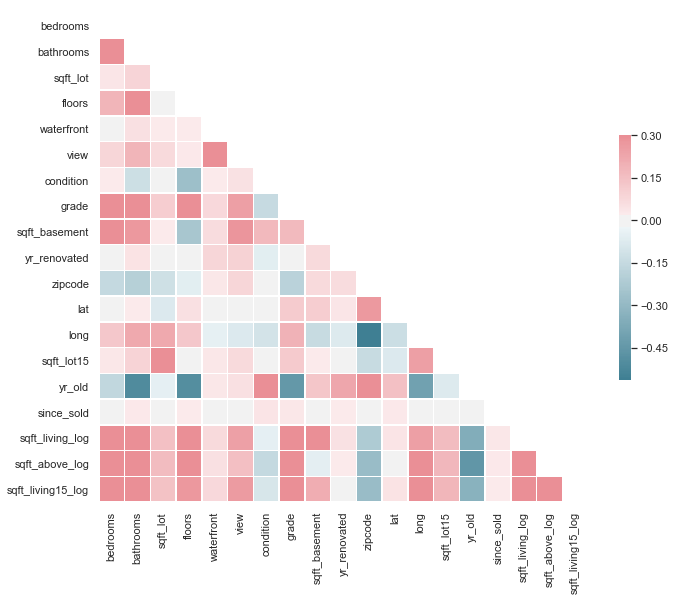

In [42]:

sns.set(style="white")


# Compute the correlation matrix
corr = X_train.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [43]:
len(X_train.columns)

19

In [44]:
# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
X_train.drop(columns=to_drop, inplace=True)
X_test.drop(columns=to_drop, inplace=True)


In [45]:
len(X_train.columns)

19

###  F Test

F Test is a statistical test used to compare between models and check if the difference is significant between the model.

F-Test does a hypothesis testing model X and Y where X is a model created by just a constant and Y is the model created by a constant and a feature.

The least square errors in both the models are compared and checks if the difference in errors between model X and Y are significant or introduced by chance.

F-Test is useful in feature selection as we get to know the significance of each feature in improving the model.

Scikit learn provides the Selecting K best features using F-Test.

***I am using the F-test to sleect the 10 top varaibles for this model***

In [46]:
from sklearn.feature_selection import SelectKBest, f_regression,mutual_info_regression

selector = SelectKBest(f_regression, k=10)

selector.fit(X_train, y_train)

SelectKBest(k=10, score_func=<function f_regression at 0x1a22c05620>)

In [47]:
selected_columns = X_train.columns[selector.get_support()]
removed_columns = X_train.columns[~selector.get_support()]
X_train = X_train[selected_columns]
X_test = X_test[selected_columns]

In [48]:
list(removed_columns)

['sqft_lot',
 'waterfront',
 'condition',
 'yr_renovated',
 'zipcode',
 'long',
 'sqft_lot15',
 'yr_old',
 'since_sold']

In [49]:
list(selected_columns)

['bedrooms',
 'bathrooms',
 'floors',
 'view',
 'grade',
 'sqft_basement',
 'lat',
 'sqft_living_log',
 'sqft_above_log',
 'sqft_living15_log']

# Wrapper Methods

Wrapper methods consider the selection of a set of features as a search problem, where different combinations are prepared, evaluated and compared to other combinations. A predictive model is used to evaluate a combination of features and assign a score based on model accuracy.

The search process may be methodical such as a best-first search, it may stochastic such as a random hill-climbing algorithm, or it may use heuristics, like forward and backward passes to add and remove features.

Wrapper Methods promises you a best set of features with a extensive greedy search.

But the main drawbacks of wrapper methods is the sheer amount of models that needs to be trained. It is computationally very expensive and is infeasible with large number of features.



![alt text](./resources/Wrapper_1.webp)

### Recursive Feature Elimination

An example if a wrapper method is the recursive feature elimination algorithm.

As the name suggests, this method eliminates worst performing features on a particular model one after the other until the best subset of features are known.


Recursive elimination eliminates the least explaining features one after the other.
For data with n features,

- On first round ‘n-1’ models are created with combination of all features except one. The least performing feature is removed

- On second round ‘n-2’ models are created by removing another feature.



<img src='./resources/rfe_graph.png' width=500/>

In [52]:
from sklearn.feature_selection import RFECV

In [53]:
ols = linear_model.LinearRegression()

In [54]:
# Create recursive feature eliminator that scores features by mean squared errors
selector = RFECV(estimator=ols, step=1, cv=5, scoring='neg_mean_squared_error')

# Fit recursive feature eliminator 
selector.fit(X_train, y_train)



RFECV(cv=5,
   estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False),
   min_features_to_select=1, n_jobs=None, scoring='neg_mean_squared_error',
   step=1, verbose=0)

In [55]:
selected_columns = X_train.columns[selector.support_]
removed_columns = X_train.columns[~selector.support_]


In [56]:
list(removed_columns)

[]

In [57]:
len(list(selected_columns))

19

# Embedded Methods

Embedded methods learn which features best contribute to the accuracy of the model while the model is being created. The most common type of embedded feature selection methods are regularization methods.

Regularization methods are also called penalization methods that introduce additional constraints into the optimization of a predictive algorithm (such as a regression algorithm) that bias the model toward lower complexity (fewer coefficients).

Examples of regularization algorithms are the LASSO, Elastic Net and Ridge Regression.

![alt text](./resources/Embedded_1.webp)

***Now we will create polynomial and interaction terms***

***Now we will scale those terms***

In [58]:

X_train.head()

,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_renovated,zipcode,lat,long,sqft_lot15,yr_old,since_sold,sqft_living_log,sqft_above_log,sqft_living15_log
0,-0.403542,0.506207,-0.116962,-0.910967,-0.087401,-0.304417,-0.633256,-0.560249,1.160748,-0.210614,1.030775,1.228256,-0.832505,-0.178546,-0.234953,-1.447833,0.305868,-0.417508,0.206354
1,-1.506721,-1.449362,-0.236225,-0.910967,-0.087401,-0.304417,0.901050,-2.271146,-0.660624,-0.210614,-0.407360,-0.456893,0.325123,-0.252125,0.617149,-1.447833,-2.357952,-1.975670,-2.021873
2,0.699638,0.506207,-0.094139,-0.910967,-0.087401,-0.304417,2.435356,0.295199,-0.660624,-0.210614,0.881359,1.092752,-0.534221,-0.175731,0.583064,-1.447833,0.216647,0.579296,-0.921626
3,-1.506721,-1.449362,-0.226590,-0.910967,-0.087401,-0.304417,-0.633256,-0.560249,-0.660624,-0.210614,0.694588,0.926976,-0.534221,-0.262914,0.821653,0.690688,-1.763821,-1.386070,-1.197746
4,-0.403542,-1.449362,-0.261948,-0.910967,-0.087401,1.000874,0.901050,0.295199,0.477733,-0.210614,0.750619,-0.026596,-0.370874,-0.317476,0.787569,0.690688,-0.636328,-1.259225,0.001870


In [59]:
lm = linear_model.LinearRegression()
lm.fit(X_train, y_train)
y_train_pred = lm.predict(X_train)
y_test_pred = lm.predict(X_test)

***Plot the residuals after fitting a linear model***

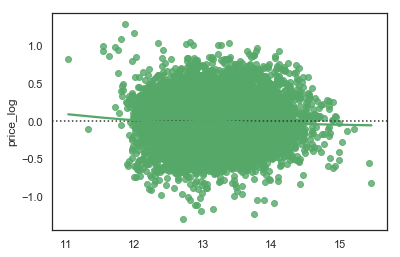

In [60]:

sns.residplot(y_train_pred, y_train, lowess=True, color="g")

### Based on this residual plot how might we want to transform our data?

***Plot to compare the size of all of our coefficients***

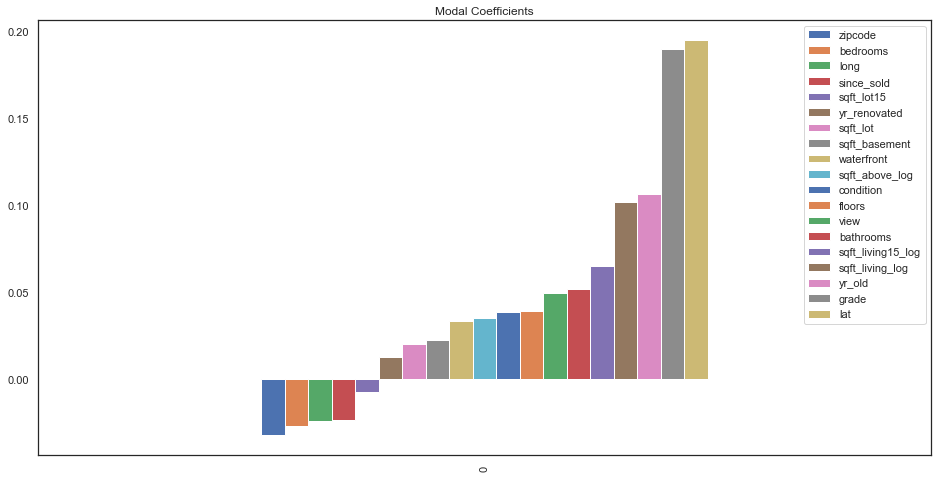

In [62]:
coef = pd.DataFrame(data=lm.coef_ ).T
coef.columns = feature_columns

model_coef = coef.T.sort_values(by=0).T
model_coef.plot(kind='bar', title='Modal Coefficients', legend=True, figsize=(16,8),)

In [66]:
model_coef.T

,0
zipcode,-0.032283
bedrooms,-0.026767
long,-0.023803
since_sold,-0.023509
sqft_lot15,-0.007158
yr_renovated,0.012709
sqft_lot,0.020000
sqft_basement,0.022360
waterfront,0.033326
sqft_above_log,0.034937


In [67]:
## training the model
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.01, normalize=False)

lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_pred = lasso.predict(X_test)

train_rmse = metrics.mean_absolute_error(y_train, y_train_pred)
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Training Error: '+ str(train_rmse) )
print('Testing Error: '+ str(test_rmse) )




Training Error: 0.1964305274755315
Testing Error: 0.25304628701451237


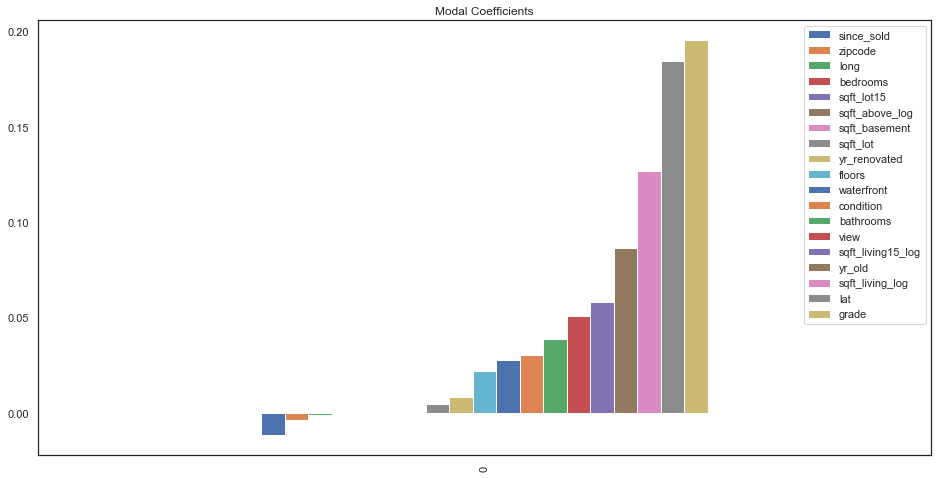

In [69]:
lasso_coef01 = pd.DataFrame(data=lasso.coef_).T
lasso_coef01.columns = X_train.columns
lasso_coef01 = lasso_coef01.T.sort_values(by=0).T
lasso_coef01.plot(kind='bar', title='Modal Coefficients', legend=True, figsize=(16,8))

In [33]:
lasso_coef01.T

,0
since_sold,-0.011883
zipcode,-0.003704
long,-0.001212
bedrooms,-0.000000
sqft_lot15,0.000000
sqft_above_log,0.000000
sqft_basement,0.000000
sqft_lot,0.004599
yr_renovated,0.008204
floors,0.022073


Training Error: 0.24977634331163034
Testing Error: 0.3130794795465263


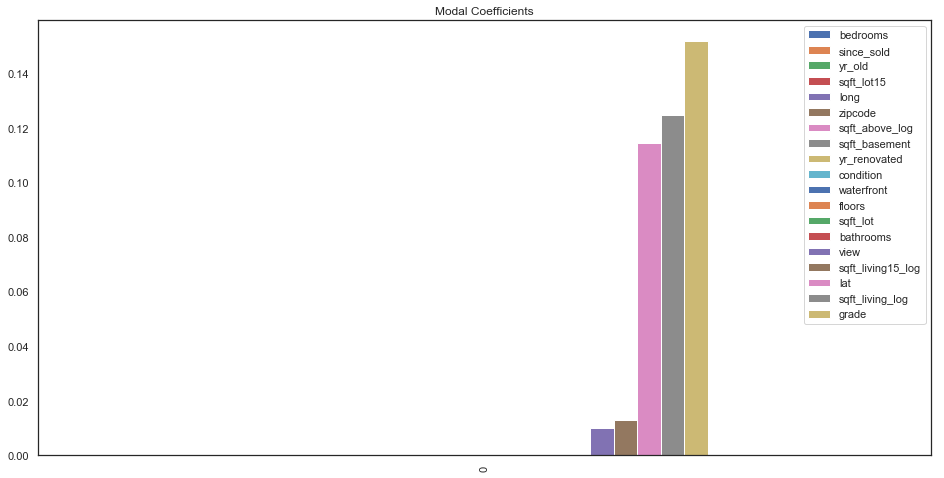

In [72]:
## training the model
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1, normalize=False)

lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_pred = lasso.predict(X_test)

train_rmse = metrics.mean_absolute_error(y_train, y_train_pred)
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Training Error: '+ str(train_rmse) )
print('Testing Error: '+ str(test_rmse) )

lasso_coef01 = pd.DataFrame(data=lasso.coef_).T
lasso_coef01.columns = X_train.columns
lasso_coef01 = lasso_coef01.T.sort_values(by=0).T
lasso_coef01.plot(kind='bar', title='Modal Coefficients', legend=True, figsize=(16,8))

In [71]:
lasso_coef01.T

,0
bedrooms,0.000000
since_sold,-0.000000
yr_old,0.000000
sqft_lot15,0.000000
long,-0.000000
zipcode,0.000000
sqft_above_log,0.000000
sqft_basement,0.000000
yr_renovated,0.000000
condition,0.000000
